# Support Vector Machines

In [55]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

In [56]:
x = [1, 5, 1.5, 8, 1, 9]
y = [2, 8, 1.8, 8, 0.6, 11]

In [68]:
from sklearn import svm, datasets

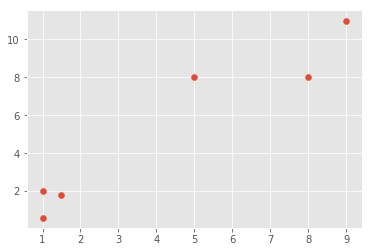

In [58]:
plt.scatter(x,y)
plt.show()

In [59]:
X = np.array([[1,2],[5,8],[1.5,1.8],[8,8],[1,0.6],[9,11]])
y=[0,1,0,1,0,1]

In [85]:
clf = svm.SVC(kernel='linear', C=1,decision_function_shape='ovr')

In [86]:
clf.fit(X,y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [87]:
clf.score(X,y)

0.81999999999999995

In [88]:
print(clf.predict([0.58,0.76]))
print(clf.predict([10.58,10.76]))

[0]
[0]


C:\Users\srija boinpali\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\srija boinpali\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


[-2.22720466  2.24959915]


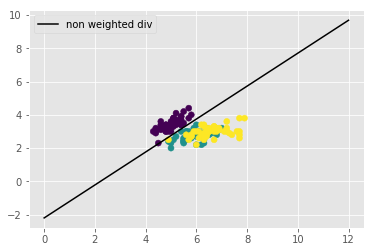

In [89]:
w = clf.coef_[0]
print(w)

a = -w[0] / w[1]

xx = np.linspace(0,12)
yy = a * xx - clf.intercept_[0] / w[1]

h0 = plt.plot(xx, yy, 'k-', label="non weighted div")

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.legend()
plt.show()

In [90]:
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
 # avoid this ugly slicing by using a two-dim dataset
y = iris.target

In [91]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

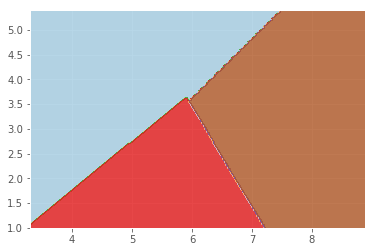

In [98]:
plt.subplot(1, 1, 1)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.show()

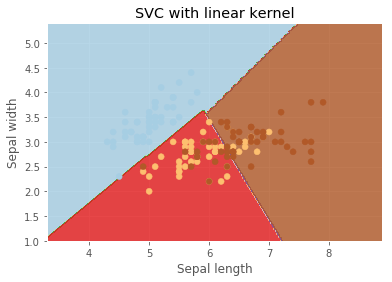

In [93]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

In [94]:
model = svm.SVC(kernel='rbf', C=1,gamma=1).fit(X, y)

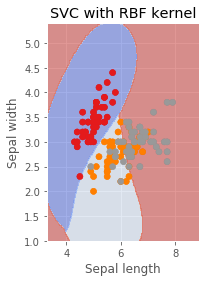

In [97]:
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.subplot(122)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with RBF kernel')
plt.show()

# grid search 

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

# shuffle the dataset
X, y = shuffle(X, y, random_state=0)

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

# Set the parameters by cross-validation
parameters = [{'kernel': ['rbf'],
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
                'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

print("# Tuning hyper-parameters")
print()

clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), parameters, cv=5)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on training set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

# Tuning hyper-parameters

Best parameters set found on development set:

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

Grid scores on training set:

0.652 (+/-0.112) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.652 (+/-0.112) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.652 (+/-0.112) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.768 (+/-0.232) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.777 (+/-0.236) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.804 (+/-0.220) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.652 (+/-0.112) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.652 (+/-0.112) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.786 (+/-0.205) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.795 (+/-0.233) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.786 (+/-0.220) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.804 (+/-0.220) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.652 (+/-0.112) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.786 (+/-0.205) for {'C': 100, 'gam

# Test our model

In [100]:
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.60      0.82      0.69        11
          2       0.83      0.62      0.71        16

avg / total       0.81      0.79      0.79        38


